In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df=pd.read_csv('/Users/krunal/Documents/Sem7/MachineLearning/stk_pred.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [5]:

data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [6]:
for i in range(data.shape[1]):
    data.iloc[:, i] = data.iloc[:, i].str.lower()

In [7]:
new_Index = data.columns # Assign column names of 'data' to new_Index
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [8]:
headlines = [' '.join(str(x) for x in data.iloc[row, :]) for row in range(len(data.index))]

In [ ]:
'''headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
#headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [9]:
vectorizer = CountVectorizer(ngram_range=(1,1))
X_train = vectorizer.fit_transform(headlines)
y_train = train['Label']

In [10]:
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
classifier.fit(X_train, y_train)

,n_estimators,200
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [12]:
test_dataset = vectorizer.transform(test_transform)

In [13]:
predictions = classifier.predict(test_dataset)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)


[[145  41]
 [ 17 175]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       186
           1       0.81      0.91      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



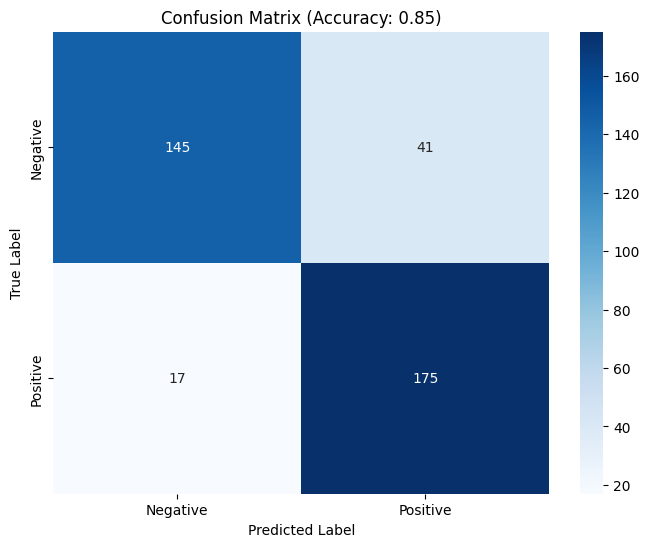

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Accuracy: {score:.2f})')
plt.show()

In [16]:
from sklearn.metrics import classification_report
y_test = test['Label']
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.78      0.83       186
           1       0.81      0.91      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



In [17]:

user_input = input("Enter a news headline:\n")
cleaned_input = user_input.strip()
vectorized_input = vectorizer.transform([cleaned_input])

predicted_label = classifier.predict(vectorized_input)[0]

if predicted_label == 1:
    print("Predicted Stock Movement: Up")
else:
    print("Predicted Stock Movement: Down")


Predicted Stock Movement: Up


In [ ]:
# Implementation of Second ML Model - Support Vector Machine (SVM)

Now we'll implement a Support Vector Machine classifier for comparison with the Random Forest model. SVM is known to work well with text classification tasks and high-dimensional data like our vectorized text features.

In [18]:
# Import SVM classifier
from sklearn.svm import SVC

# Train SVM classifier
print("Training SVM Classifier...")
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
print("SVM training completed!")

Training SVM Classifier...
SVM training completed!
SVM training completed!


In [19]:
# Make predictions using SVM
print("Making predictions with SVM...")
svm_predictions = svm_classifier.predict(test_dataset)
print("SVM predictions completed!")

Making predictions with SVM...
SVM predictions completed!
SVM predictions completed!


In [20]:
# Evaluate SVM model performance
svm_matrix = confusion_matrix(test['Label'], svm_predictions)
svm_score = accuracy_score(test['Label'], svm_predictions)
svm_report = classification_report(test['Label'], svm_predictions)

print("SVM Model Results:")
print("Confusion Matrix:")
print(svm_matrix)
print(f"\nAccuracy Score: {svm_score:.4f}")
print(f"\nClassification Report:")
print(svm_report)

SVM Model Results:
Confusion Matrix:
[[151  35]
 [ 32 160]]

Accuracy Score: 0.8228

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       186
           1       0.82      0.83      0.83       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



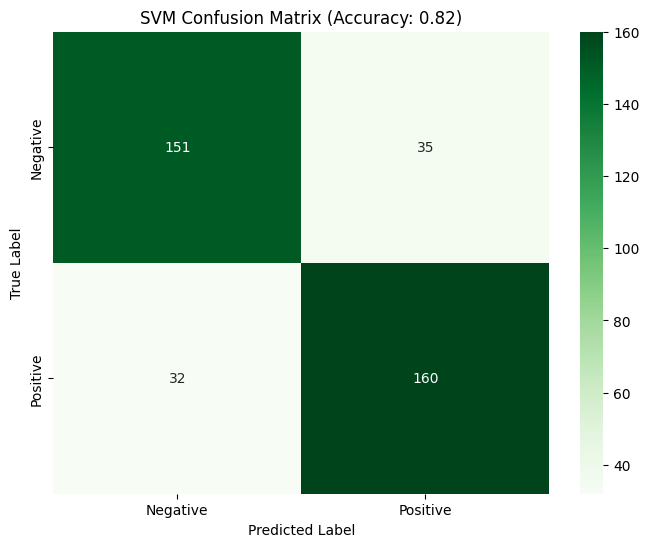

In [21]:
# Visualize SVM confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'SVM Confusion Matrix (Accuracy: {svm_score:.2f})')
plt.show()

# Model Comparison and Analysis

Let's compare the performance of both models to understand which one performs better for our stock prediction task.

In [22]:
# Comparative Analysis of Models
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for Random Forest
rf_precision = precision_score(test['Label'], predictions, average='weighted')
rf_recall = recall_score(test['Label'], predictions, average='weighted')
rf_f1 = f1_score(test['Label'], predictions, average='weighted')

# Calculate metrics for SVM
svm_precision = precision_score(test['Label'], svm_predictions, average='weighted')
svm_recall = recall_score(test['Label'], svm_predictions, average='weighted')
svm_f1 = f1_score(test['Label'], svm_predictions, average='weighted')

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    'Accuracy': [score, svm_score],
    'Precision': [rf_precision, svm_precision],
    'Recall': [rf_recall, svm_recall],
    'F1-Score': [rf_f1, svm_f1]
})

print("Model Performance Comparison:")
print("="*50)
print(comparison_df.round(4))

# Find the best performing model
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
best_accuracy = comparison_df['Accuracy'].max()
print(f"\nBest Performing Model: {best_model} with Accuracy: {best_accuracy:.4f}")

Model Performance Comparison:
           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest    0.8466     0.8519  0.8466    0.8458
1            SVM    0.8228     0.8228  0.8228    0.8227

Best Performing Model: Random Forest with Accuracy: 0.8466


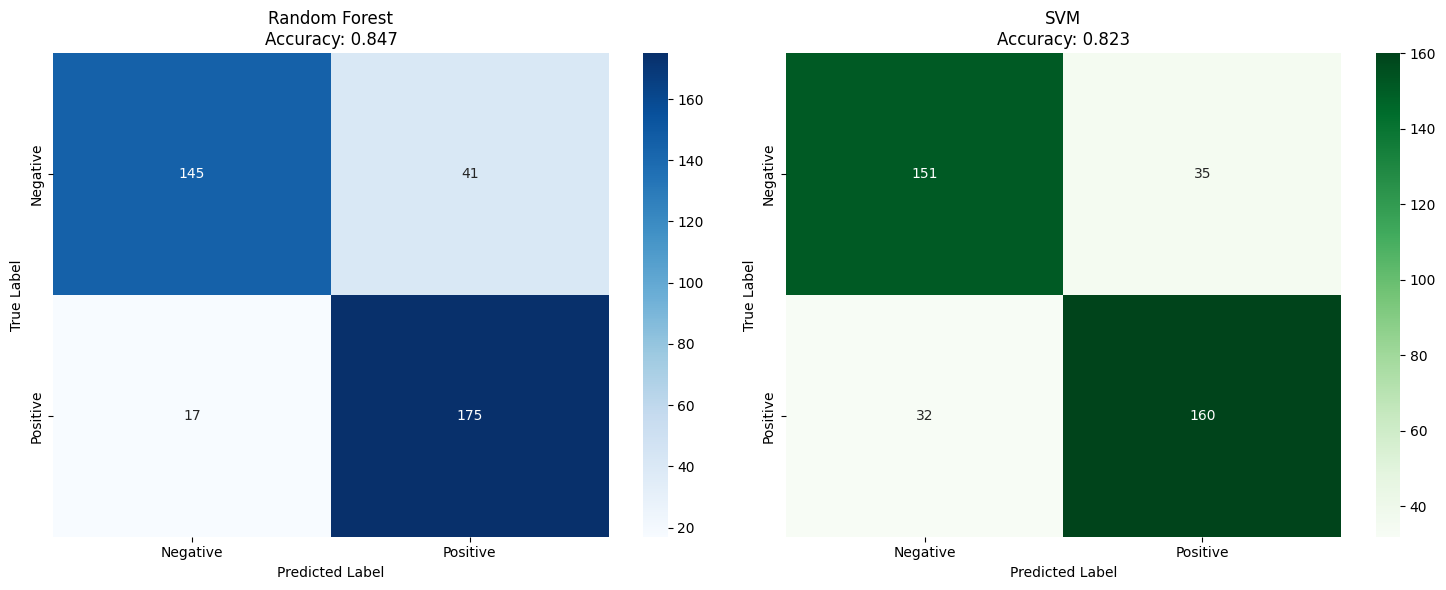

In [23]:
# Side-by-side comparison of confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest confusion matrix
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title(f'Random Forest\nAccuracy: {score:.3f}')

# SVM confusion matrix
sns.heatmap(svm_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title(f'SVM\nAccuracy: {svm_score:.3f}')

plt.tight_layout()
plt.show()

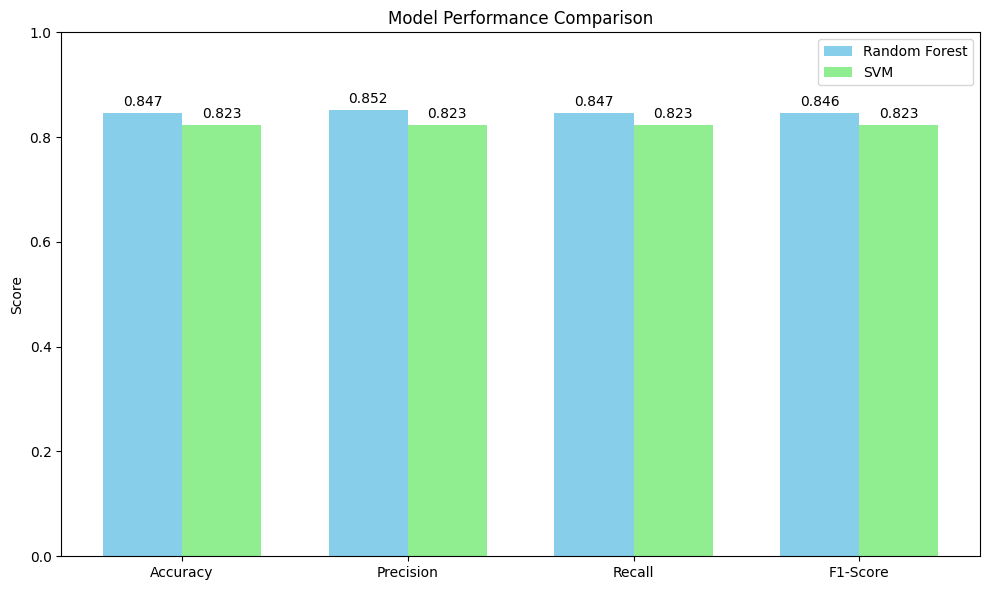

In [24]:
# Bar chart comparison of performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_values = [score, rf_precision, rf_recall, rf_f1]
svm_values = [svm_score, svm_precision, svm_recall, svm_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rf_values, width, label='Random Forest', color='skyblue')
rects2 = ax.bar(x + width/2, svm_values, width, label='SVM', color='lightgreen')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [25]:
# Interactive prediction with both models
def predict_with_both_models(headline):
    """
    Function to predict stock movement using both Random Forest and SVM models
    """
    cleaned_input = headline.strip()
    vectorized_input = vectorizer.transform([cleaned_input])
    
    # Random Forest prediction
    rf_prediction = classifier.predict(vectorized_input)[0]
    rf_proba = classifier.predict_proba(vectorized_input)[0]
    
    # SVM prediction
    svm_prediction = svm_classifier.predict(vectorized_input)[0]
    
    print(f"News Headline: '{headline}'")
    print("="*60)
    print(f"Random Forest Prediction: {'Up' if rf_prediction == 1 else 'Down'}")
    print(f"Random Forest Confidence: {max(rf_proba):.3f}")
    print(f"SVM Prediction: {'Up' if svm_prediction == 1 else 'Down'}")
    print("="*60)
    
    if rf_prediction == svm_prediction:
        print(f"✅ Both models agree: Stock movement will be {'UP' if rf_prediction == 1 else 'DOWN'}")
    else:
        print("⚠️  Models disagree on the prediction!")
    
    return rf_prediction, svm_prediction

# Test with sample headlines
test_headlines = [
    "Company reports record profits this quarter",
    "Economic recession fears grow as unemployment rises",
    "New technology breakthrough announced by major corporation",
    "Government announces new tax policies affecting businesses"
]

print("Testing Both Models with Sample Headlines:")
print("="*80)
for headline in test_headlines:
    predict_with_both_models(headline)
    print("\n")

Testing Both Models with Sample Headlines:
News Headline: 'Company reports record profits this quarter'
Random Forest Prediction: Up
Random Forest Confidence: 0.590
SVM Prediction: Up
✅ Both models agree: Stock movement will be UP


News Headline: 'Economic recession fears grow as unemployment rises'
Random Forest Prediction: Up
Random Forest Confidence: 0.570
SVM Prediction: Up
✅ Both models agree: Stock movement will be UP


News Headline: 'New technology breakthrough announced by major corporation'
Random Forest Prediction: Up
Random Forest Confidence: 0.540
SVM Prediction: Up
✅ Both models agree: Stock movement will be UP


News Headline: 'Government announces new tax policies affecting businesses'
Random Forest Prediction: Up
Random Forest Confidence: 0.580
SVM Prediction: Up
✅ Both models agree: Stock movement will be UP


